# Import libraries and data

In [166]:
# import libraries 
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

from matplotlib_venn import venn2
from utils import increase_stringency_CSF

In [167]:
data_path = os.getcwd() + "/Datasets/"
fig_path = os.getcwd() + "/Figures/"

## Feature brain data set

In [168]:
df_features = pd.read_csv(data_path + "/Features/df_features_brain_elevated.csv")
df_features

Uniprot                                           Sequence  Length  \
0     Q6ZMQ8  MSSSFFNPSFAFSSHFDPDGAPLSELSWPSSLAVVAVSFSGLFAVI...    1374   
1     Q9BZC7  MGFLHQLQLLLWKNVTLKRRSPWVLAFEIFIPLVLFFILLGLRQKK...    2435   
2     Q9NP78  MRLWKAVVVTLAFMSVDICVTTAIYVFSHLDRSLLEDIRHFNIFDS...     766   
3     Q9UBJ2  MTHMLNAAADRVKWTRSSAAKRAACLVAAAYALKTLYPIIGKRLKQ...     740   
4     Q7Z5M8  MDAQDCQAAASPEPPGPPARSCVAAWWDMVDRNLRYFPHSCSMLGR...     362   
...      ...                                                ...     ...   
2537  Q05996  MACRQRGGSWSPSGWFNAGWSTYRSISLFFALVTSGNSIDVSQLVN...     745   
2538  Q8TCW7  MEQIWLLLLLTIRVLPGSAQFNGYNCDANLHSRFPAERDISVYCGV...     415   
2539  Q96SZ4  MGPRASLSRLRELCGHWLRPALHTKKQILELLVLEQFLSVLPPHLL...     725   
2540  Q96LW9  MASTEEQYDLKIVKVEEDPIWDQETHLRGNNFSGQEASRQLFRQFC...     406   
2541  Q86XI8  MERPEPPPGTAAGQEEQELRERAFFSWAEFSRFFDAWCQQRLALFF...     627   

      Molecular weight         A         C         D         E         F  \
0          144567.7122  0.105531  0.022562  0.051674  0.088792  0.034934   
1          269829.6684  0.078850  0.016838  0.043532  0.057084  0.045996   
2           84473.7976  0.087467  0.010444  0.033943  0.048303  0.050914   
3           83231.8369  0.085135  0.013514  0.043243  0.060811  0.031081   
4           40775.8685  0.074586  0.027624  0.058011  0.049724  0.046961   
...                ...       ...       ...       ...       ...       ...   
2537        82355.6650  0.059060  0.028188  0.055034  0.046980  0.049664   
2538        45529.4831  0.050602  0.031325  0.045783  0.024096  0.048193   
2539        80385.8099  0.074483  0.052414  0.027586  0.073103  0.034483   
2540        47292.5570  0.039409  0.041872  0.029557  0.133005  0.032020   
2541        70072.1554  0.108453  0.027113  0.052632  0.076555  0.038278   

             G  ...  GlycoMine_N  GlycoMine_O  GlycoMine_C  GPI-anchor  \
0     0.094614  ...            0            0            0           0   
1     0.069815  ...            1            0            0           0   
2     0.074413  ...            1            0            0           0   
3     0.062162  ...            0            0            0           0   
4     0.063536  ...            0            0            0           0   
...        ...  ...          ...          ...          ...         ...   
2537  0.065772  ...            1            0            0           0   
2538  0.067470  ...            0            0            0           0   
2539  0.075862  ...            0            1            0           0   
2540  0.054187  ...            0            1            0           0   
2541  0.095694  ...            0            0            0           0   

      Signal peptide  RNA_binding  DNA_binding  Prot_bind  Prot_bind_binary  \
0                  0            0            0   0.000000                 0   
1                  0            0            0   0.000000                 0   
2                  0            0            0   0.014360                 1   
3                  0            0            0   0.006757                 1   
4                  0            0            0   0.024862                 1   
...              ...          ...          ...        ...               ...   
2537               0            0            0   0.005369                 1   
2538               1            0            0   0.033735                 1   
2539               0            0            1   0.000000                 0   
2540               0            0            1   0.002463                 1   
2541               0            0            0   0.000000                 0   

      CSF  
0      -1  
1       1  
2       1  
3      -1  
4      -1  
...   ...  
2537    1  
2538   -1  
2539   -1  
2540   -1  
2541   -1  

[2542 rows x 80 columns]

In [169]:
# add ectodomain annoation as a feature
shed = pd.read_csv(data_path + "/Features/Shedding_proteins_UniProt.txt", header=None, names=["Uniprot"])
df_features["Ectodomain_shedding"] = np.where(df_features["Uniprot"].isin(shed["Uniprot"]), 1, 0)

shed_DeepSMP = pd.read_csv(data_path + "/Features/Known_shedding_proteins_DeepSMP.txt", sep="\t")
df_features["Ectodomain_shedding"] = np.where(df_features["Uniprot"].isin(shed_DeepSMP["Uniprot ID"]), 1, 
    df_features["Ectodomain_shedding"])

## CSF data set

In [171]:
csf = pd.read_csv(data_path + "CSF/csf.csv")

## Create stringent data sets

In [172]:
# create more stringent data sets
df_features_2plus = increase_stringency_CSF(df_features, csf, 2)
print("Number of proteins in dataset:", len(df_features_2plus))
print("-------------")
df_features_3plus = increase_stringency_CSF(df_features, csf, 3)
print("Number of proteins in dataset:", len(df_features_3plus))

Number of CSF proteins to be removed: 303
Number of CSF proteins left: 692
Number of proteins in dataset: 2239
-------------
Number of CSF proteins to be removed: 454
Number of CSF proteins left: 541
Number of proteins in dataset: 2088


In [173]:
non_CSF = df_features[df_features["CSF"] == -1]
CSF_1plus = df_features[df_features["CSF"] == 1]
CSF_2plus = df_features_2plus[df_features_2plus["CSF"] == 1]
CSF_3plus = df_features_3plus[df_features_3plus["CSF"] == 1]

df_list = [non_CSF, CSF_1plus, CSF_2plus, CSF_3plus]
names = ["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"]

# Feature Analysis

In [174]:
def get_percentages(df_list, col):
        
    perc_list = []
    for i in range(len(df_list)):
        perc_list.append(sum(df_list[i][col])/len(df_list[i]))

    return perc_list

In [175]:
def plot_percentages(feature_list, file_name, sharey=True):
    """
    """

    fig, ax = plt.subplots(1, len(feature_list), figsize=(5*len(feature_list), 5), sharey=sharey)

    for i in range(len(feature_list)):
        bars = ax[i].bar(x=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], 
            height=get_percentages(df_list, feature_list[i]), color=["darkred", "skyblue", "steelblue", "darkcyan"], 
            edgecolor="black")
        ax[i].bar_label(bars, fmt="%.4f")
        ax[i].tick_params(axis="x", labelrotation=45)
        if i == 0:
            ax[i].set(ylabel="Fraction", title=feature_list[i])
        else:
            ax[i].set(ylabel=None, title=feature_list[i])
    
    plt.show()
    
    fig.savefig(fig_path + file_name, bbox_inches="tight")

## Subcellular localization

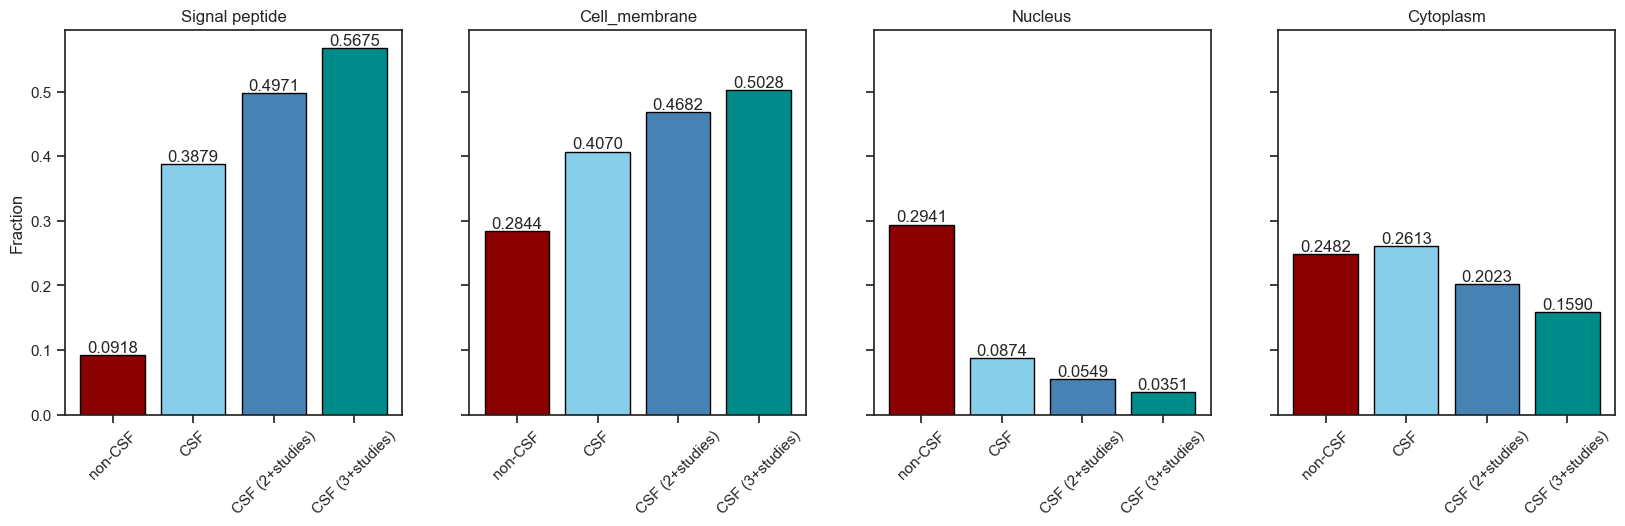

In [176]:
plot_percentages(["Signal peptide", "Cell_membrane", "Nucleus", "Cytoplasm"], "Bar_sucellular_localization_A.png")

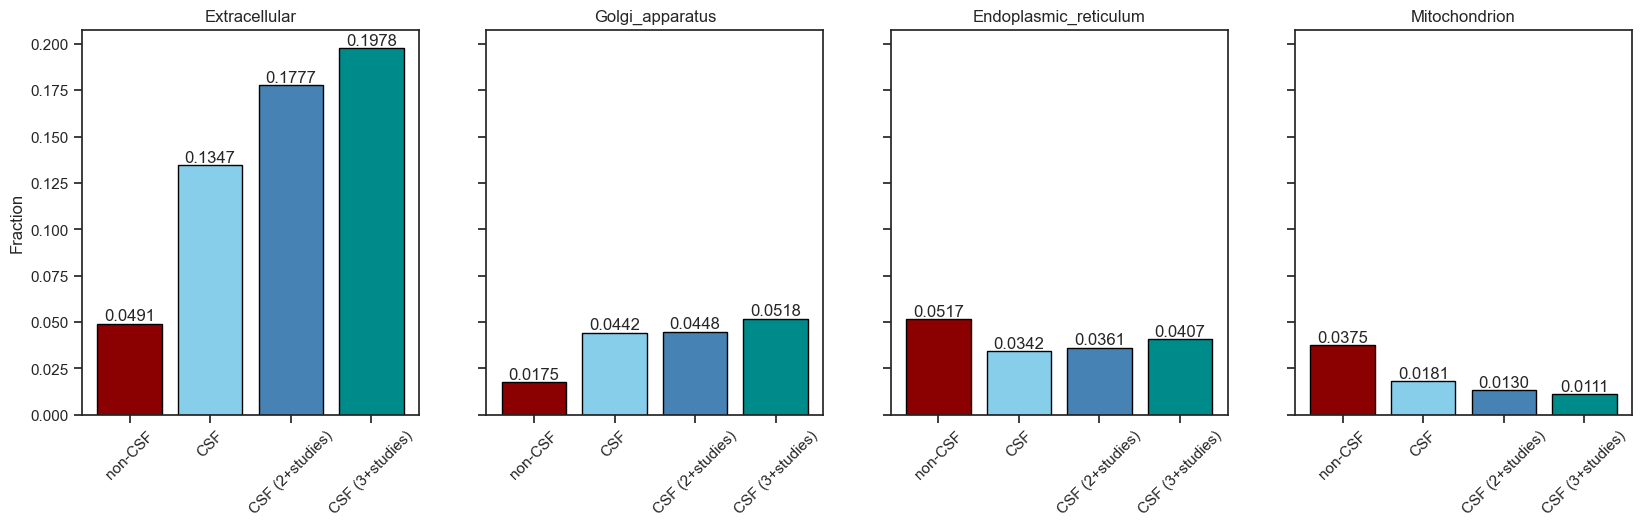

In [177]:
plot_percentages(["Extracellular", "Golgi_apparatus", "Endoplasmic_reticulum", "Mitochondrion"], 
    "Bar_sucellular_localization_B.png")
# "Peroxisome"
# "Lysosome/Vacuole"
# "Plastid"

## Glycosylation

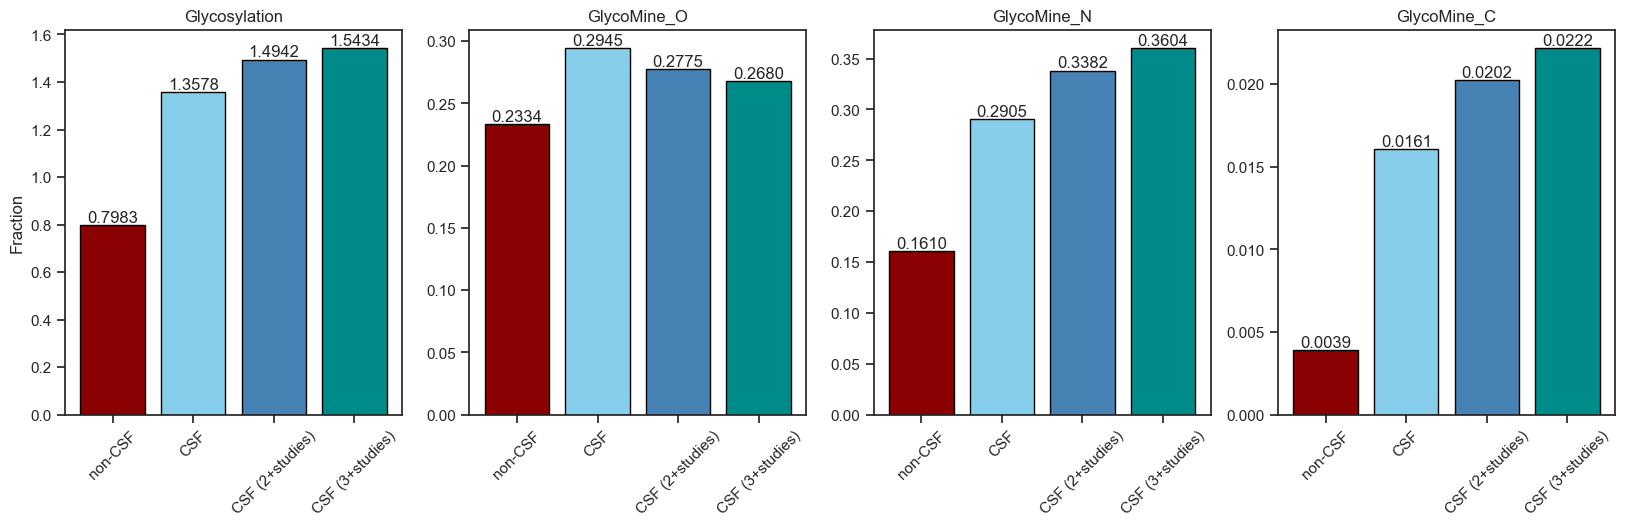

In [178]:
plot_percentages(["Glycosylation", "GlycoMine_O", "GlycoMine_N", "GlycoMine_C"], "Bar_Glycosylation.png", sharey=False)

## Motifs

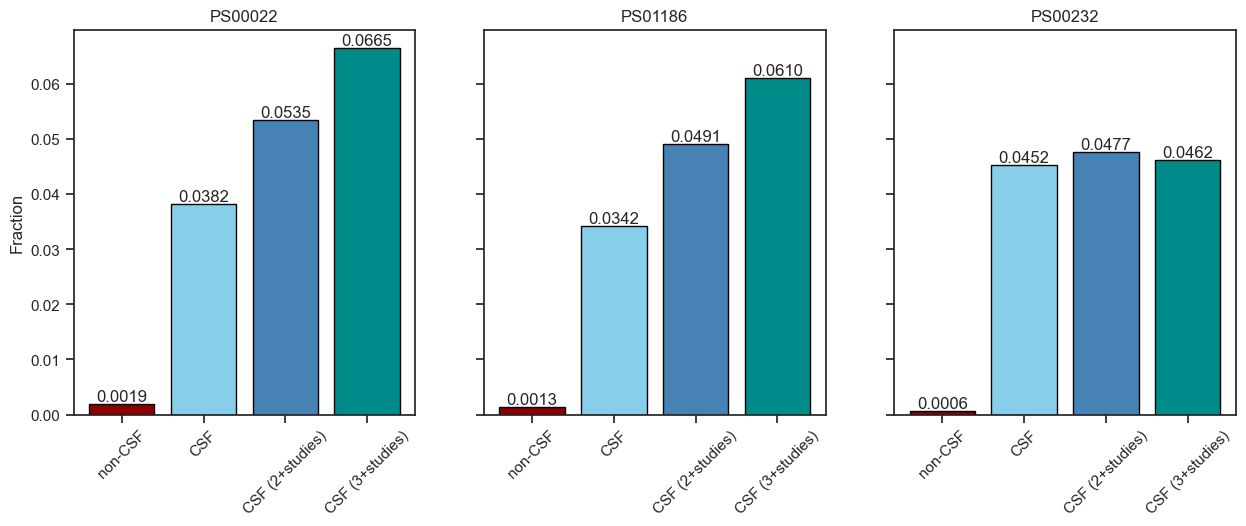

In [179]:
# EGF1 (PS00022)
# EGF2 (PS01186)
# Cadherin-1 (PS00232)
# G-protein receptor F1 (PS00237)
# Homeobox (PS00027)
# Zinc Finger C2H2 (PS00028)

plot_percentages(["PS00022", "PS01186", "PS00232"], "Bar_motifs_A.png")

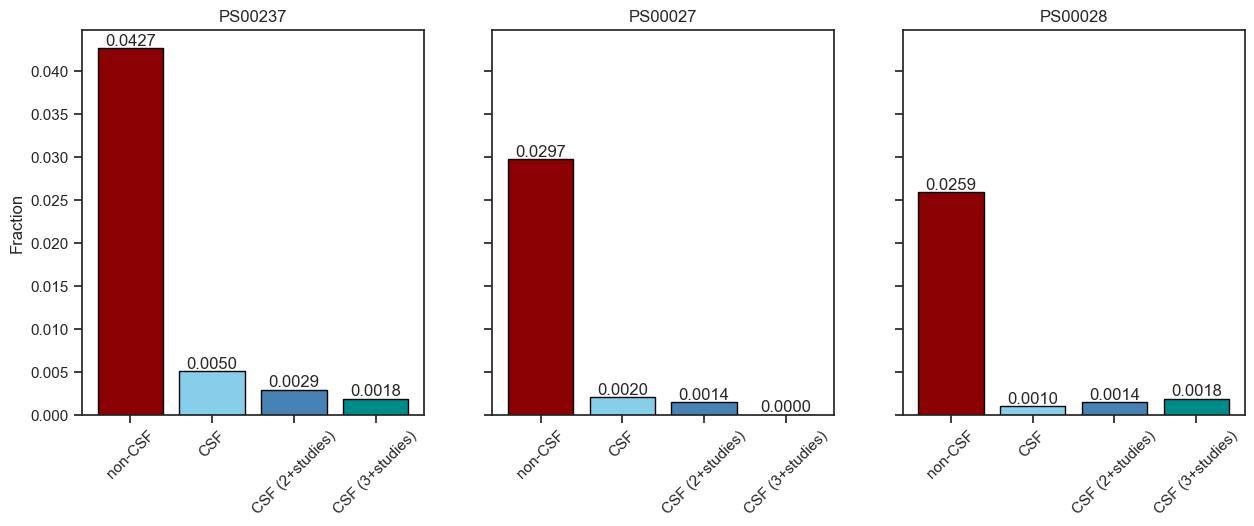

In [180]:
plot_percentages(["PS00237", "PS00027", "PS00028"], "Bar_motifs_B.png")

## Residue binding

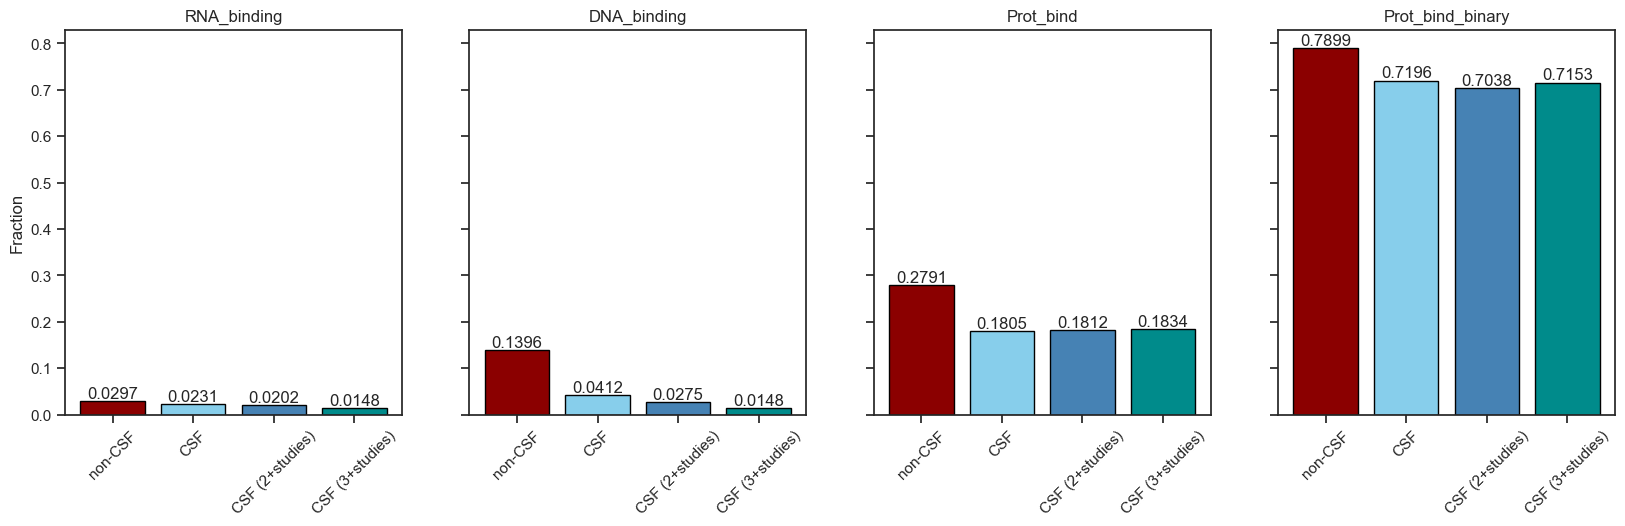

In [181]:
plot_percentages(["RNA_binding", "DNA_binding", "Prot_bind", "Prot_bind_binary"], "Bar_residue_binding.png")

## Transmembrane

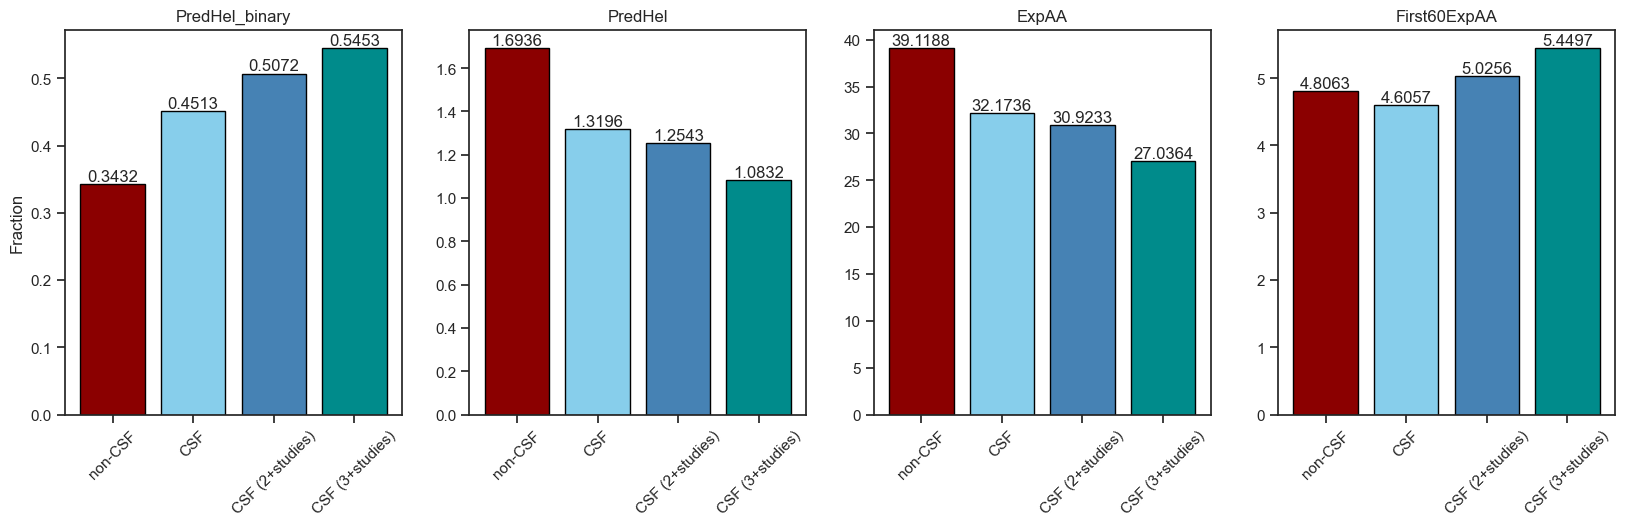

In [182]:
plot_percentages(["PredHel_binary", "PredHel", "ExpAA", "First60ExpAA"], "Bar_transmembrane.png", sharey=False)

In [183]:
# empty dataframe 
tm_df = pd.DataFrame()

for i, data in enumerate(df_list):
    # add proportions of transmembrane region counts to dataframe
    tm = pd.Series(data["PredHel"].value_counts(normalize=True).sort_index(), name=names[i])
    tm_df = pd.merge(tm_df, tm, left_index=True, right_index=True, how="outer")
    
tm_df.reset_index(inplace=True)

In [184]:
# aggregate values of all proteins with >7 predicted transmembrane regions
tm_df_8plus = tm_df[8:].agg([sum])
# add aggregated values to transmembrane dataframe (remove single values for aggregated values)
tm_df = pd.concat([tm_df[:8], tm_df_8plus])
tm_df.loc["sum", "index"] = ">7"

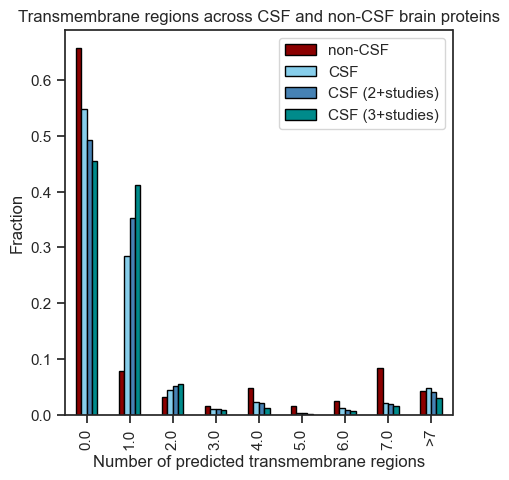

In [185]:
fig, ax = plt.subplots(figsize=(5, 5))

tm_df.plot(x="index", y=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], kind="bar",
          color=["darkred", "skyblue", "steelblue", "darkcyan"], edgecolor="black", ax=ax)
ax.set(xlabel="Number of predicted transmembrane regions", ylabel="Fraction", 
    title="Transmembrane regions across CSF and non-CSF brain proteins")

plt.show()   
fig.savefig(fig_path + "Bar_number_of_transmembrane_regions.png", bbox_inches="tight")

In [186]:
#### TO DO #####
# move this part to feature generation

def count_domains(df):
    
    domains = df["Topological domain"]
    
    df["Cytoplasmic_domain"] = 0
    df["Extracellular_domain"] = 0
    df["Lumenal_domain"] = 0
    df["Vesicular_domain"] = 0
    
    if type(domains) != str:
        return df
    else:
        df["Cytoplasmic_domain"] = domains.count("Cytoplasmic")
        df["Extracellular_domain"] = domains.count("Extracellular")
        df["Lumenal_domain"] = domains.count("Lumenal")
        df["Vesicular_domain"] = domains.count("Vesicular")
        
    return df

In [187]:
tm_info = pd.read_csv(data_path + "Features/Uniprot_topological_domain_transmembrane_human_proteome.tab", sep="\t", header=0, 
    names=["Uniprot", "Topological domain", "Transmembrane"])
# drop entries without information
tm_info.dropna(axis=0, how="all", subset=["Topological domain", "Transmembrane"], inplace=True)
# subset brain proteome
tm_info_brain = tm_info[tm_info["Uniprot"].isin(df_features["Uniprot"])]
tm_info_brain

Uniprot                                 Topological domain  \
15     Q7L8C5  TOPO_DOM 1..6;  /note="Vesicular";  /evidence=...   
16     Q9BT88  TOPO_DOM 1..15;  /note="Vesicular";  /evidence...   
21     Q5DID0  TOPO_DOM 22..1272;  /note="Extracellular";  /e...   
22     Q8TBG9  TOPO_DOM 1..4;  /note="Cytoplasmic";  /evidenc...   
50     Q9UKU6  TOPO_DOM 1..40;  /note="Cytoplasmic";  /eviden...   
...       ...                                                ...   
20347  Q12879  TOPO_DOM 23..555;  /note="Extracellular";  /ev...   
20354  Q13224  TOPO_DOM 27..557;  /note="Extracellular";  /ev...   
20359  Q14957  TOPO_DOM 20..554;  /note="Extracellular";  /ev...   
20362  O15399  TOPO_DOM 28..584;  /note="Extracellular";  /ev...   
20364  Q05586  TOPO_DOM 19..559;  /note="Extracellular";  /ev...   

                                           Transmembrane  
15     TRANSMEM 7..29;  /note="Helical";  /evidence="...  
16     TRANSMEM 16..36;  /note="Helical";  /evidence=...  
21     TRANSMEM 1273..1293;  /note="Helical";  /evide...  
22     TRANSMEM 5..25;  /note="Helical";  /evidence="...  
50     TRANSMEM 41..61;  /note="Helical; Signal-ancho...  
...                                                  ...  
20347  TRANSMEM 556..576;  /note="Helical";  /evidenc...  
20354  TRANSMEM 558..576;  /note="Helical";  /evidenc...  
20359  TRANSMEM 555..573;  /note="Helical";  /evidenc...  
20362  TRANSMEM 585..603;  /note="Helical";  /evidenc...  
20364  TRANSMEM 560..580;  /note="Helical";  /evidenc...  

[976 rows x 3 columns]

In [188]:
tm_info_brain = tm_info_brain.apply(count_domains, axis=1)
# tm_info_brain = tm_info_brain.apply(count_transmembrane_structures, axis=1)
tm_info_brain.drop(["Topological domain", "Transmembrane"], axis=1, inplace=True)
tm_info_brain

Uniprot  Cytoplasmic_domain  Extracellular_domain  Lumenal_domain  \
15     Q7L8C5                   1                     0               0   
16     Q9BT88                   1                     0               0   
21     Q5DID0                   1                     1               0   
22     Q8TBG9                   3                     0               0   
50     Q9UKU6                   1                     1               0   
...       ...                 ...                   ...             ...   
20347  Q12879                   3                     2               0   
20354  Q13224                   3                     2               0   
20359  Q14957                   3                     2               0   
20362  O15399                   3                     2               0   
20364  Q05586                   3                     2               0   

       Vesicular_domain  
15                    1  
16                    1  
21                    0  
22                    2  
50                    0  
...                 ...  
20347                 0  
20354                 0  
20359                 0  
20362                 0  
20364                 0  

[976 rows x 5 columns]

In [189]:
df_features = df_features.merge(tm_info_brain, on="Uniprot", how="left")
df_features.fillna(0, inplace=True)
df_features

Uniprot                                           Sequence  Length  \
0     Q6ZMQ8  MSSSFFNPSFAFSSHFDPDGAPLSELSWPSSLAVVAVSFSGLFAVI...    1374   
1     Q9BZC7  MGFLHQLQLLLWKNVTLKRRSPWVLAFEIFIPLVLFFILLGLRQKK...    2435   
2     Q9NP78  MRLWKAVVVTLAFMSVDICVTTAIYVFSHLDRSLLEDIRHFNIFDS...     766   
3     Q9UBJ2  MTHMLNAAADRVKWTRSSAAKRAACLVAAAYALKTLYPIIGKRLKQ...     740   
4     Q7Z5M8  MDAQDCQAAASPEPPGPPARSCVAAWWDMVDRNLRYFPHSCSMLGR...     362   
...      ...                                                ...     ...   
2537  Q05996  MACRQRGGSWSPSGWFNAGWSTYRSISLFFALVTSGNSIDVSQLVN...     745   
2538  Q8TCW7  MEQIWLLLLLTIRVLPGSAQFNGYNCDANLHSRFPAERDISVYCGV...     415   
2539  Q96SZ4  MGPRASLSRLRELCGHWLRPALHTKKQILELLVLEQFLSVLPPHLL...     725   
2540  Q96LW9  MASTEEQYDLKIVKVEEDPIWDQETHLRGNNFSGQEASRQLFRQFC...     406   
2541  Q86XI8  MERPEPPPGTAAGQEEQELRERAFFSWAEFSRFFDAWCQQRLALFF...     627   

      Molecular weight         A         C         D         E         F  \
0          144567.7122  0.105531  0.022562  0.051674  0.088792  0.034934   
1          269829.6684  0.078850  0.016838  0.043532  0.057084  0.045996   
2           84473.7976  0.087467  0.010444  0.033943  0.048303  0.050914   
3           83231.8369  0.085135  0.013514  0.043243  0.060811  0.031081   
4           40775.8685  0.074586  0.027624  0.058011  0.049724  0.046961   
...                ...       ...       ...       ...       ...       ...   
2537        82355.6650  0.059060  0.028188  0.055034  0.046980  0.049664   
2538        45529.4831  0.050602  0.031325  0.045783  0.024096  0.048193   
2539        80385.8099  0.074483  0.052414  0.027586  0.073103  0.034483   
2540        47292.5570  0.039409  0.041872  0.029557  0.133005  0.032020   
2541        70072.1554  0.108453  0.027113  0.052632  0.076555  0.038278   

             G  ...  RNA_binding  DNA_binding  Prot_bind  Prot_bind_binary  \
0     0.094614  ...            0            0   0.000000                 0   
1     0.069815  ...            0            0   0.000000                 0   
2     0.074413  ...            0            0   0.014360                 1   
3     0.062162  ...            0            0   0.006757                 1   
4     0.063536  ...            0            0   0.024862                 1   
...        ...  ...          ...          ...        ...               ...   
2537  0.065772  ...            0            0   0.005369                 1   
2538  0.067470  ...            0            0   0.033735                 1   
2539  0.075862  ...            0            1   0.000000                 0   
2540  0.054187  ...            0            1   0.002463                 1   
2541  0.095694  ...            0            0   0.000000                 0   

      CSF  Ectodomain_shedding  Cytoplasmic_domain  Extracellular_domain  \
0      -1                    0                 0.0                   0.0   
1       1                    0                 0.0                   0.0   
2       1                    0                 0.0                   0.0   
3      -1                    0                 0.0                   0.0   
4      -1                    0                 0.0                   0.0   
...   ...                  ...                 ...                   ...   
2537    1                    0                 1.0                   1.0   
2538   -1                    0                 1.0                   1.0   
2539   -1                    0                 0.0                   0.0   
2540   -1                    0                 0.0                   0.0   
2541   -1                    0                 0.0                   0.0   

      Lumenal_domain  Vesicular_domain  
0                0.0               0.0  
1                0.0               0.0  
2                0.0               0.0  
3                0.0               0.0  
4                0.0               0.0  
...              ...               ...  
2537             0.0               0.0  
2538         

In [190]:
df_features["Cytoplasmic_domain_binary"] = np.where(df_features["Cytoplasmic_domain"] == 0, 0, 1)
df_features["Extracellular_domain_binary"] = np.where(df_features["Extracellular_domain"] == 0, 0, 1)
df_features["Lumenal_domain_binary"] = np.where(df_features["Lumenal_domain"] == 0, 0, 1)
df_features["Vesicular_domain_binary"] = np.where(df_features["Vesicular_domain"] == 0, 0, 1)
df_features

Uniprot                                           Sequence  Length  \
0     Q6ZMQ8  MSSSFFNPSFAFSSHFDPDGAPLSELSWPSSLAVVAVSFSGLFAVI...    1374   
1     Q9BZC7  MGFLHQLQLLLWKNVTLKRRSPWVLAFEIFIPLVLFFILLGLRQKK...    2435   
2     Q9NP78  MRLWKAVVVTLAFMSVDICVTTAIYVFSHLDRSLLEDIRHFNIFDS...     766   
3     Q9UBJ2  MTHMLNAAADRVKWTRSSAAKRAACLVAAAYALKTLYPIIGKRLKQ...     740   
4     Q7Z5M8  MDAQDCQAAASPEPPGPPARSCVAAWWDMVDRNLRYFPHSCSMLGR...     362   
...      ...                                                ...     ...   
2537  Q05996  MACRQRGGSWSPSGWFNAGWSTYRSISLFFALVTSGNSIDVSQLVN...     745   
2538  Q8TCW7  MEQIWLLLLLTIRVLPGSAQFNGYNCDANLHSRFPAERDISVYCGV...     415   
2539  Q96SZ4  MGPRASLSRLRELCGHWLRPALHTKKQILELLVLEQFLSVLPPHLL...     725   
2540  Q96LW9  MASTEEQYDLKIVKVEEDPIWDQETHLRGNNFSGQEASRQLFRQFC...     406   
2541  Q86XI8  MERPEPPPGTAAGQEEQELRERAFFSWAEFSRFFDAWCQQRLALFF...     627   

      Molecular weight         A         C         D         E         F  \
0          144567.7122  0.105531  0.022562  0.051674  0.088792  0.034934   
1          269829.6684  0.078850  0.016838  0.043532  0.057084  0.045996   
2           84473.7976  0.087467  0.010444  0.033943  0.048303  0.050914   
3           83231.8369  0.085135  0.013514  0.043243  0.060811  0.031081   
4           40775.8685  0.074586  0.027624  0.058011  0.049724  0.046961   
...                ...       ...       ...       ...       ...       ...   
2537        82355.6650  0.059060  0.028188  0.055034  0.046980  0.049664   
2538        45529.4831  0.050602  0.031325  0.045783  0.024096  0.048193   
2539        80385.8099  0.074483  0.052414  0.027586  0.073103  0.034483   
2540        47292.5570  0.039409  0.041872  0.029557  0.133005  0.032020   
2541        70072.1554  0.108453  0.027113  0.052632  0.076555  0.038278   

             G  ...  CSF  Ectodomain_shedding  Cytoplasmic_domain  \
0     0.094614  ...   -1                    0                 0.0   
1     0.069815  ...    1                    0                 0.0   
2     0.074413  ...    1                    0                 0.0   
3     0.062162  ...   -1                    0                 0.0   
4     0.063536  ...   -1                    0                 0.0   
...        ...  ...  ...                  ...                 ...   
2537  0.065772  ...    1                    0                 1.0   
2538  0.067470  ...   -1                    0                 1.0   
2539  0.075862  ...   -1                    0                 0.0   
2540  0.054187  ...   -1                    0                 0.0   
2541  0.095694  ...   -1                    0                 0.0   

      Extracellular_domain  Lumenal_domain  Vesicular_domain  \
0                      0.0             0.0               0.0   
1                      0.0             0.0               0.0   
2                      0.0             0.0               0.0   
3                      0.0             0.0               0.0   
4                      0.0             0.0               0.0   
...                    ...             ...               ...   
2537                   1.0             0.0               0.0   
2538                   1.0             0.0               0.0   
2539                   0.0             0.0               0.0   
2540                   0.0             0.0               0.0   
2541                   0.0             0.0               0.0   

      Cytoplasmic_domain_binary  Extracellular_domain_binary  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   
...                         ...                          ...   
2537                          1                            1   
2538                          1                            1   
2539             

In [191]:
# redo dataset creation with additional features
df_features_2plus = increase_stringency_CSF(df_features, csf, 2)
print("Number of proteins in dataset:", len(df_features_2plus))
print("-------------")
df_features_3plus = increase_stringency_CSF(df_features, csf, 3)
print("Number of proteins in dataset:", len(df_features_3plus))

non_CSF = df_features[df_features["CSF"] == -1]
CSF_1plus = df_features[df_features["CSF"] == 1]
CSF_2plus = df_features_2plus[df_features_2plus["CSF"] == 1]
CSF_3plus = df_features_3plus[df_features_3plus["CSF"] == 1]

df_list = [non_CSF, CSF_1plus, CSF_2plus, CSF_3plus]
names = ["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"]

Number of CSF proteins to be removed: 303
Number of CSF proteins left: 692
Number of proteins in dataset: 2239
-------------
Number of CSF proteins to be removed: 454
Number of CSF proteins left: 541
Number of proteins in dataset: 2088


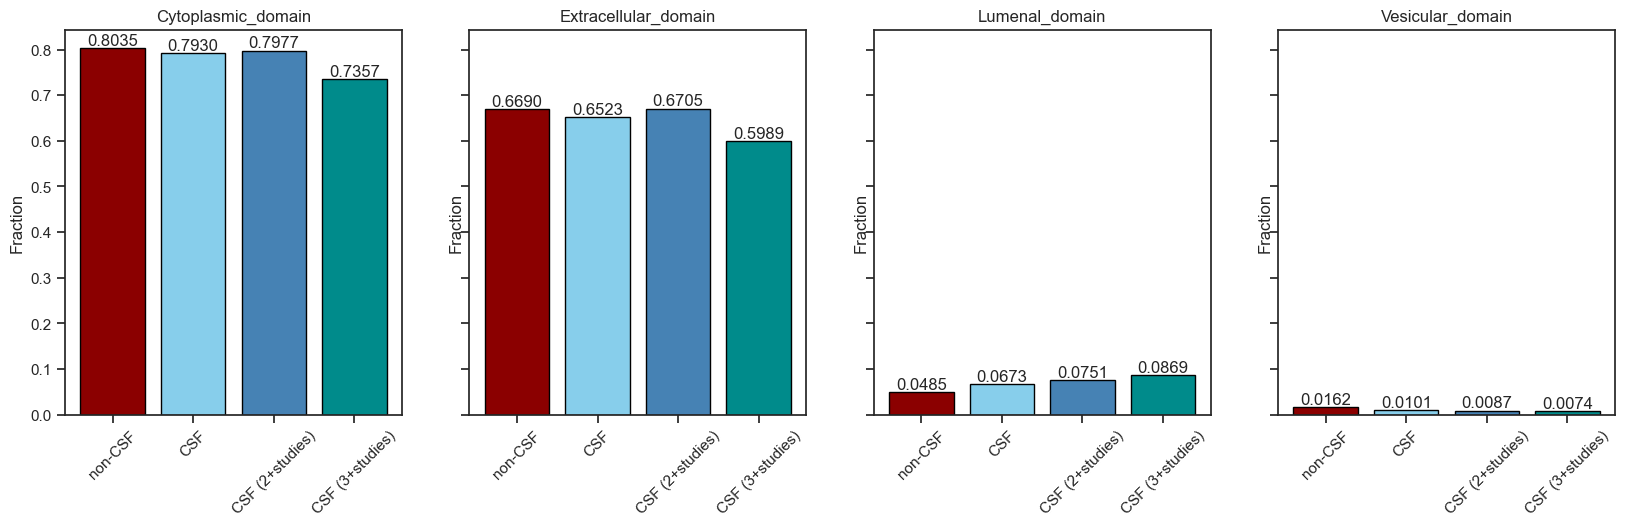

In [192]:
features = ["Cytoplasmic_domain", "Extracellular_domain", "Lumenal_domain", "Vesicular_domain"]

fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for i in range(len(features)):
    bars = ax[i].bar(x=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], height=get_percentages(df_list, features[i]),
        color=["darkred", "skyblue", "steelblue", "darkcyan"], edgecolor="black")
    ax[i].bar_label(bars, fmt="%.4f")
    ax[i].tick_params(axis="x", labelrotation=45)
    ax[i].set(ylabel="Fraction", title=features[i])

plt.show()

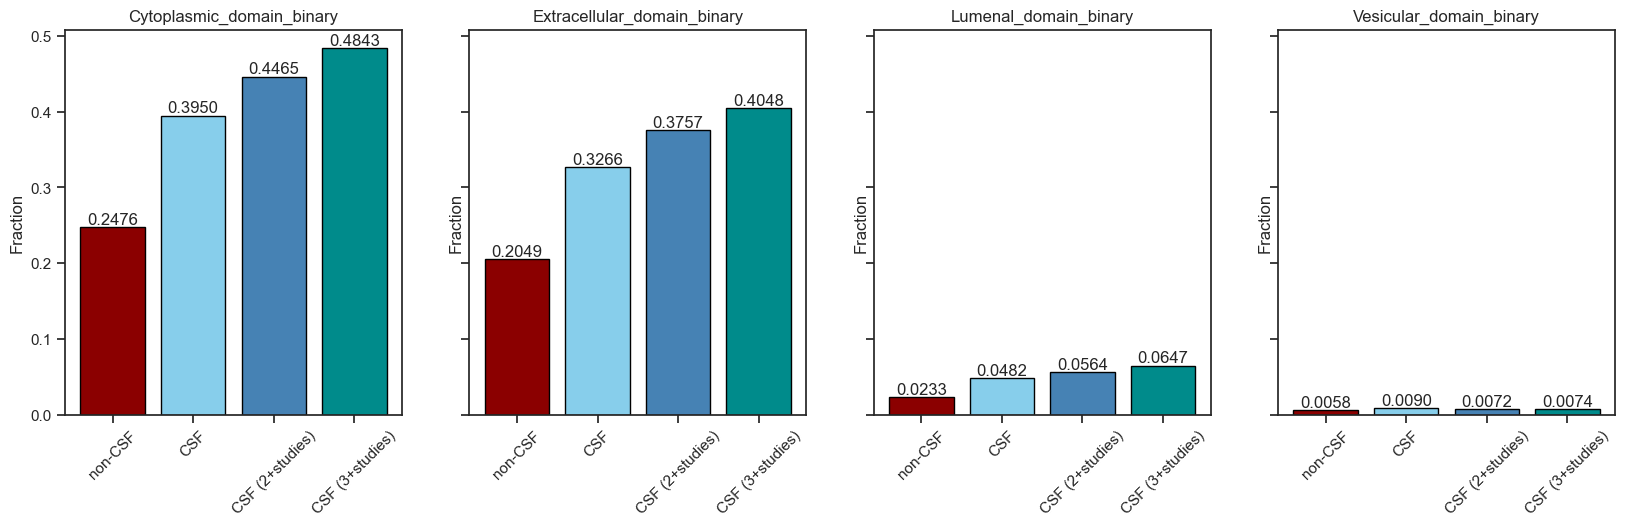

In [193]:
features = ["Cytoplasmic_domain_binary", "Extracellular_domain_binary", "Lumenal_domain_binary", "Vesicular_domain_binary"]

fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for i in range(len(features)):
    bars = ax[i].bar(x=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], height=get_percentages(df_list, features[i]),
        color=["darkred", "skyblue", "steelblue", "darkcyan"], edgecolor="black")
    ax[i].bar_label(bars, fmt="%.4f")
    ax[i].tick_params(axis="x", labelrotation=45)
    ax[i].set(ylabel="Fraction", title=features[i])

plt.show()

In [194]:
cytoplasmic_df = pd.DataFrame()

for i, data in enumerate(df_list):
    # add proportions of transmembrane region counts to dataframe
    top = pd.Series(data["Cytoplasmic_domain"].value_counts(normalize=True).sort_index(), name=names[i])
    cytoplasmic_df = pd.merge(cytoplasmic_df, top, left_index=True, right_index=True, how="outer")
cytoplasmic_df.reset_index(inplace=True)


extracellular_df = pd.DataFrame()

for i, data in enumerate(df_list):
    # add proportions of transmembrane region counts to dataframe
    top = pd.Series(data["Extracellular_domain"].value_counts(normalize=True).sort_index(), name=names[i])
    extracellular_df = pd.merge(extracellular_df, top, left_index=True, right_index=True, how="outer")
extracellular_df.reset_index(inplace=True)


lumenal_df = pd.DataFrame()

for i, data in enumerate(df_list):
    # add proportions of transmembrane region counts to dataframe
    top = pd.Series(data["Lumenal_domain"].value_counts(normalize=True).sort_index(), name=names[i])
    lumenal_df = pd.merge(lumenal_df, top, left_index=True, right_index=True, how="outer")
lumenal_df.reset_index(inplace=True)


vesicular_df = pd.DataFrame()

for i, data in enumerate(df_list):
    # add proportions of transmembrane region counts to dataframe
    top = pd.Series(data["Vesicular_domain"].value_counts(normalize=True).sort_index(), name=names[i])
    vesicular_df = pd.merge(vesicular_df, top, left_index=True, right_index=True, how="outer")
vesicular_df.reset_index(inplace=True)

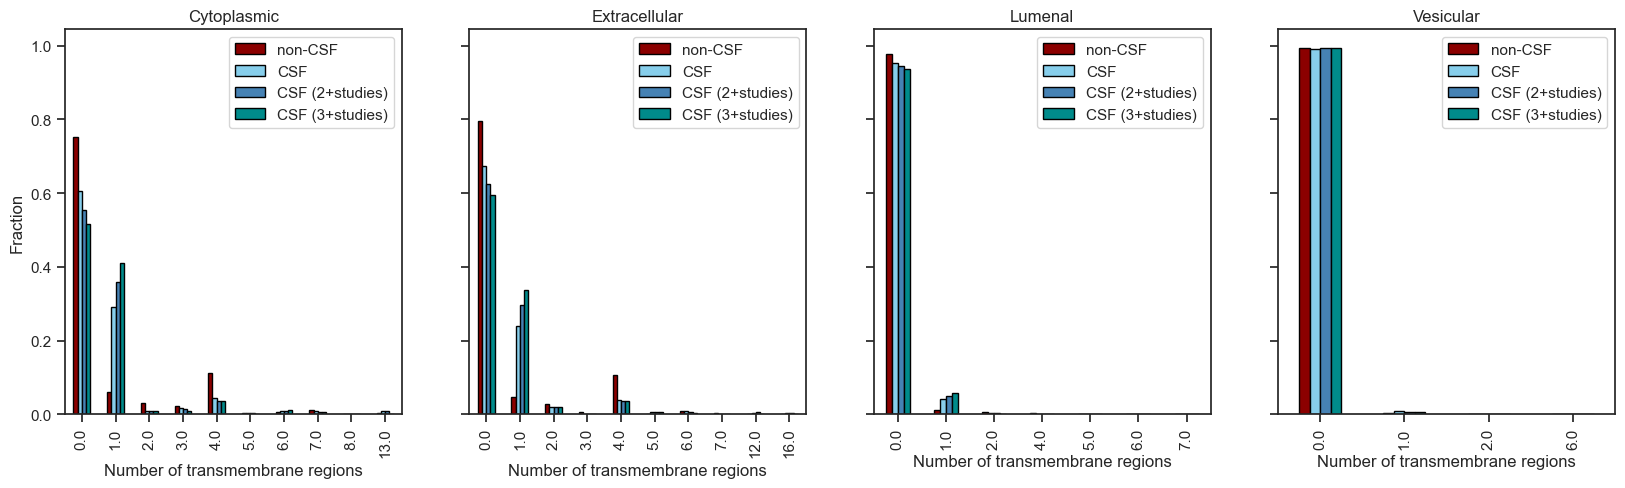

In [195]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

cytoplasmic_df.plot(x="index", y=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], kind="bar",
          color=["darkred", "skyblue", "steelblue", "darkcyan"], edgecolor="black", ax=ax[0])
ax[0].set(xlabel="Number of transmembrane regions", ylabel="Fraction", 
    title="Cytoplasmic")

extracellular_df.plot(x="index", y=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], kind="bar",
          color=["darkred", "skyblue", "steelblue", "darkcyan"], edgecolor="black", ax=ax[1])
ax[1].set(xlabel="Number of transmembrane regions", ylabel="Fraction", 
    title="Extracellular")

lumenal_df.plot(x="index", y=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], kind="bar",
          color=["darkred", "skyblue", "steelblue", "darkcyan"], edgecolor="black", ax=ax[2])
ax[2].set(xlabel="Number of transmembrane regions", ylabel="Fraction", 
    title="Lumenal")

vesicular_df.plot(x="index", y=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], kind="bar",
          color=["darkred", "skyblue", "steelblue", "darkcyan"], edgecolor="black", ax=ax[3])
ax[3].set(xlabel="Number of transmembrane regions", ylabel="Fraction", 
    title="Vesicular")

plt.show()   
fig.savefig(fig_path + "Bar_topological_domains_transmembrane.png", bbox_inches="tight")

### Ectodomain shedding annotations

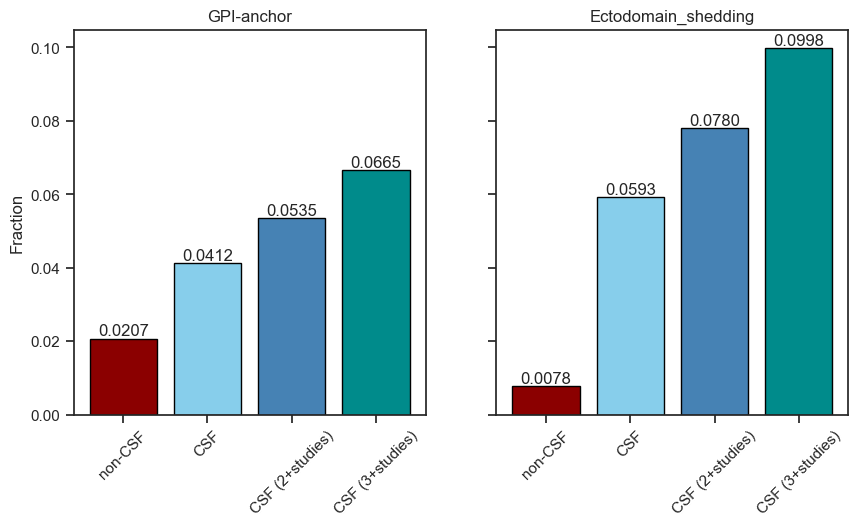

In [196]:
plot_percentages(["GPI-anchor", "Ectodomain_shedding"], "Bar_GPI-anchor_ectodomain.png")

In [197]:
pd.crosstab(df_features["Ectodomain_shedding"], df_features["PredHel"])

PredHel              0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
Ectodomain_shedding                                                         
0                    1536   368    92    37    97    29    51   147    17   
1                      26    37     3     0     1     0     0     4     0   

PredHel              9.0   10.0  11.0  12.0  14.0  15.0  17.0  19.0  20.0  \
Ectodomain_shedding                                                         
0                      15    14    15    35     4     1     4     5     1   
1                       0     0     0     0     0     0     0     0     0   

PredHel              21.0  35.0  
Ectodomain_shedding              
0                       2     1  
1                       0     0

## Structural features

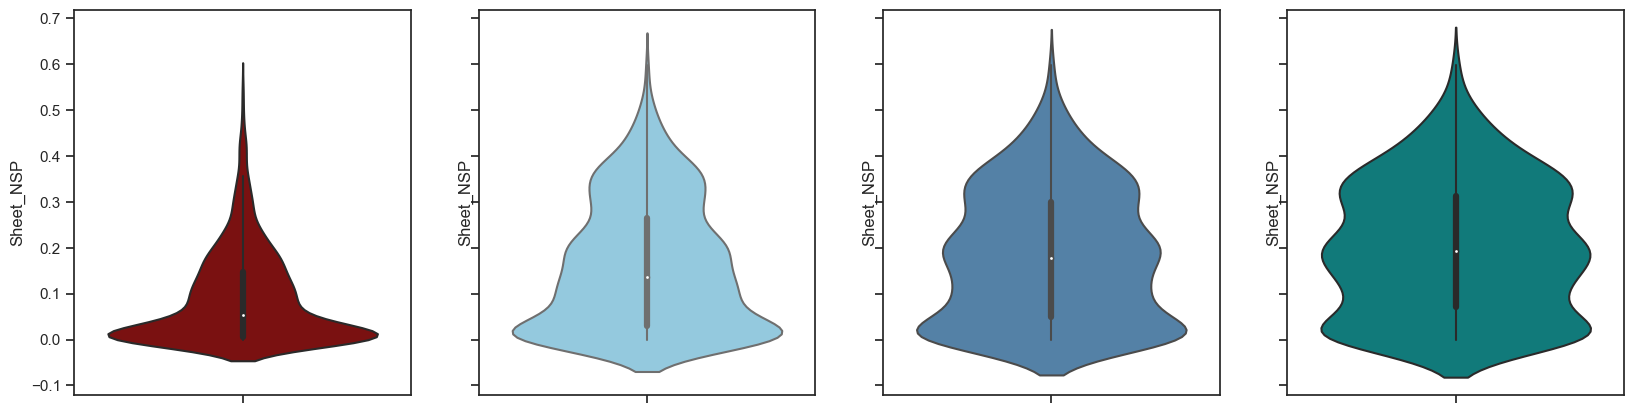

In [198]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
feature="Sheet_NSP"
color=["darkred", "skyblue", "steelblue", "darkcyan"]

sns.violinplot(data=non_CSF, y=feature, ax=ax[0], color=color[0])
sns.violinplot(data=CSF_1plus, y=feature, ax=ax[1], color=color[1])
sns.violinplot(data=CSF_2plus, y=feature, ax=ax[2], color=color[2])
sns.violinplot(data=CSF_3plus, y=feature, ax=ax[3], color=color[3])

plt.show()

# Figures for CSF Society Meeting 2022 abstract

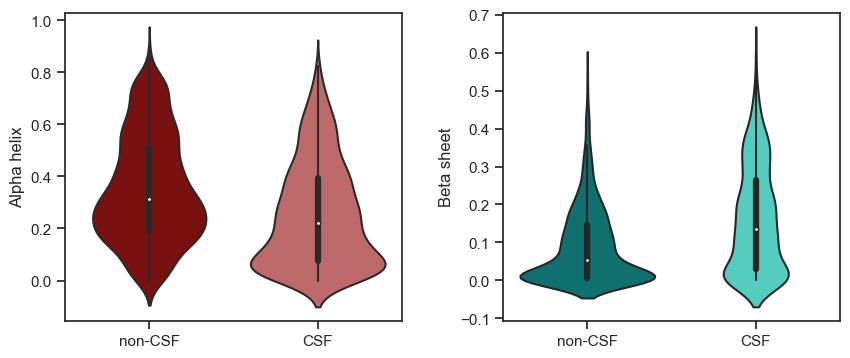

In [199]:
sns.set(style=("ticks"), font_scale=1)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.subplots_adjust(wspace=0.3)#, hspace=None)

sns.violinplot(y="Helix_NSP",  x="CSF", data=df_features, ax=axes[0], palette=["darkred", "indianred"])
axes[0].set(xlabel=None, ylabel="Alpha helix", xticklabels=["non-CSF", "CSF"])
sns.violinplot(y="Sheet_NSP",  x="CSF", data=df_features, ax=axes[1], palette=["teal", "turquoise"])
axes[1].set(xlabel=None, ylabel="Beta sheet", xticklabels=["non-CSF", "CSF"])

plt.show()
fig.savefig(fig_path + "CSF_society_meeting_Figure2.png", bbox_inches="tight")

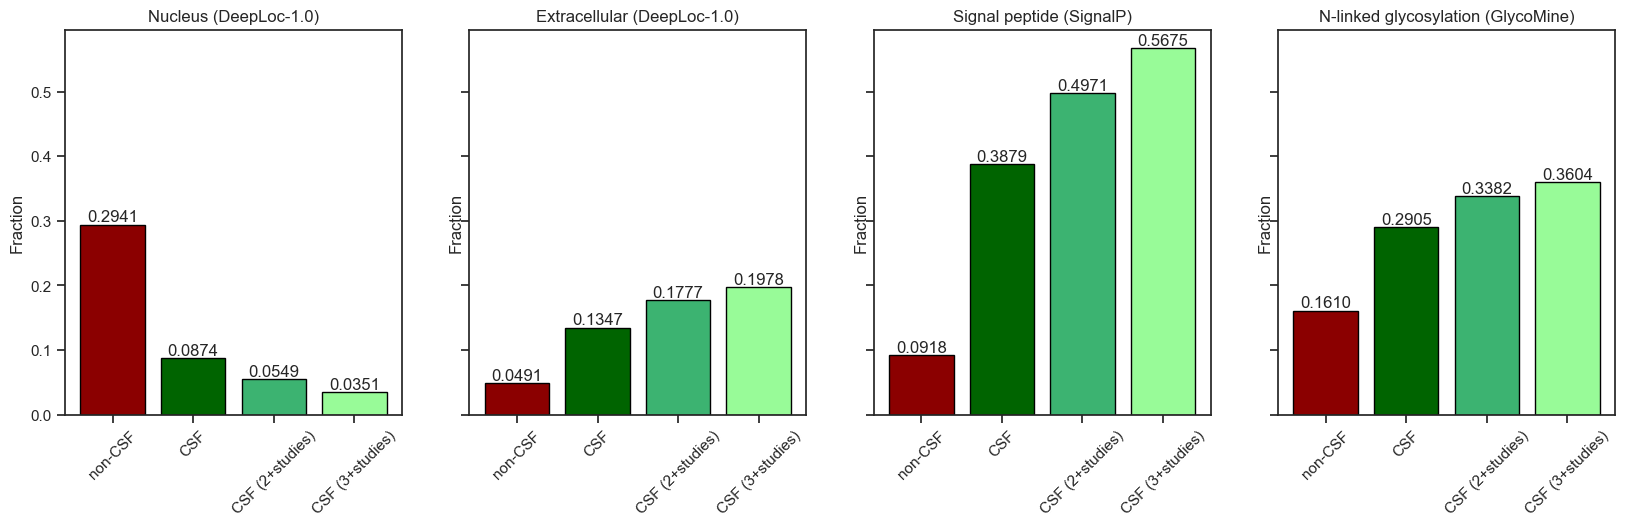

In [200]:
features = ["Nucleus", "Extracellular", "Signal peptide", "GlycoMine_N"]
names = ["Nucleus (DeepLoc-1.0)", "Extracellular (DeepLoc-1.0)", "Signal peptide (SignalP)", 
            "N-linked glycosylation (GlycoMine)"]

fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for i in range(len(features)):
    bars = ax[i].bar(x=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], height=get_percentages(df_list, features[i]),
        color=["darkred", "darkgreen", "mediumseagreen", "palegreen"], edgecolor="black")
    ax[i].bar_label(bars, fmt="%.4f")
    ax[i].tick_params(axis="x", labelrotation=45)
    ax[i].set(ylabel="Fraction", title=names[i])

plt.show()
fig.savefig(fig_path + "CSF_society_meeting_poster_A.png", bbox_inches="tight")

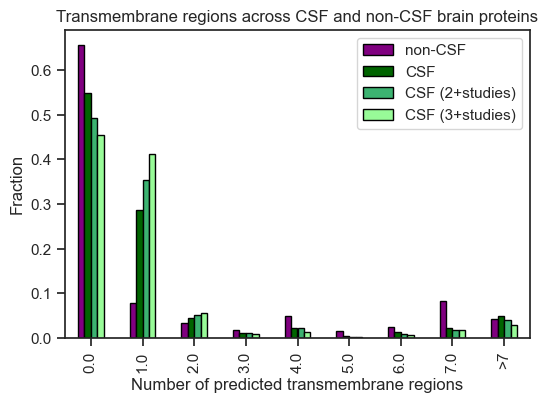

In [201]:
sns.set(style=("ticks"), font_scale=1)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

tm_df.plot(x="index", y=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], kind="bar",
          color=["purple", "darkgreen", "mediumseagreen", "palegreen"], edgecolor="black", ax=ax)
ax.set(xlabel="Number of predicted transmembrane regions", ylabel="Fraction", 
    title="Transmembrane regions across CSF and non-CSF brain proteins")

plt.show()   
fig.savefig(fig_path + "CSF_society_meeting_poster_B.png", bbox_inches="tight")